In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

In [2]:
df = pd.read_csv(r"C:\Users\HDC0422272\Downloads\GlobalLandTemperaturesByCity.csv\GlobalLandTemperaturesByCity.csv", header=0, index_col=0, parse_dates=True)
df.dropna(inplace=True)
df.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
dt,,,,,,
1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E
1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E
1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E
1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E


In [3]:
# Copying the DataFrame to Temp
Temp = df.copy()

# Columns to drop
columns_to_drop = ['LandAverageTemperatureUncertainty', 'LandMaxTemperature', 
                   'LandMaxTemperatureUncertainty', 'LandMinTemperature', 
                   'LandMinTemperatureUncertainty', 'LandAndOceanAverageTemperature', 
                   'LandAndOceanAverageTemperatureUncertainty']

# Filter out columns that are in Temp (avoid dropping non-existent columns)
columns_in_df = df.columns
columns_to_drop_existing = [col for col in columns_to_drop if col in columns_in_df]

# Drop the existing columns
Temp.drop(columns=columns_to_drop_existing, axis='columns', inplace=True)

# Check the remaining columns
print("Remaining columns after drop:", Temp.columns)

# If there is only one column left, rename it to 'Temp'
if Temp.shape[1] == 1:
    Temp.columns = ['Temp']

# Set the index name
Temp.index.name = "Date"

# Display the first few rows of the modified DataFrame
print(Temp.head())


Remaining columns after drop: Index(['AverageTemperature', 'AverageTemperatureUncertainty', 'City',
       'Country', 'Latitude', 'Longitude'],
      dtype='object')
            AverageTemperature  AverageTemperatureUncertainty   City  Country  \
Date                                                                            
1743-11-01               6.068                          1.737  Århus  Denmark   
1744-04-01               5.788                          3.624  Århus  Denmark   
1744-05-01              10.644                          1.283  Århus  Denmark   
1744-06-01              14.051                          1.347  Århus  Denmark   
1744-07-01              16.082                          1.396  Århus  Denmark   

           Latitude Longitude  
Date                           
1743-11-01   57.05N    10.33E  
1744-04-01   57.05N    10.33E  
1744-05-01   57.05N    10.33E  
1744-06-01   57.05N    10.33E  
1744-07-01   57.05N    10.33E  


Available columns: Index(['Temperature'], dtype='object')
Using column: Temperature


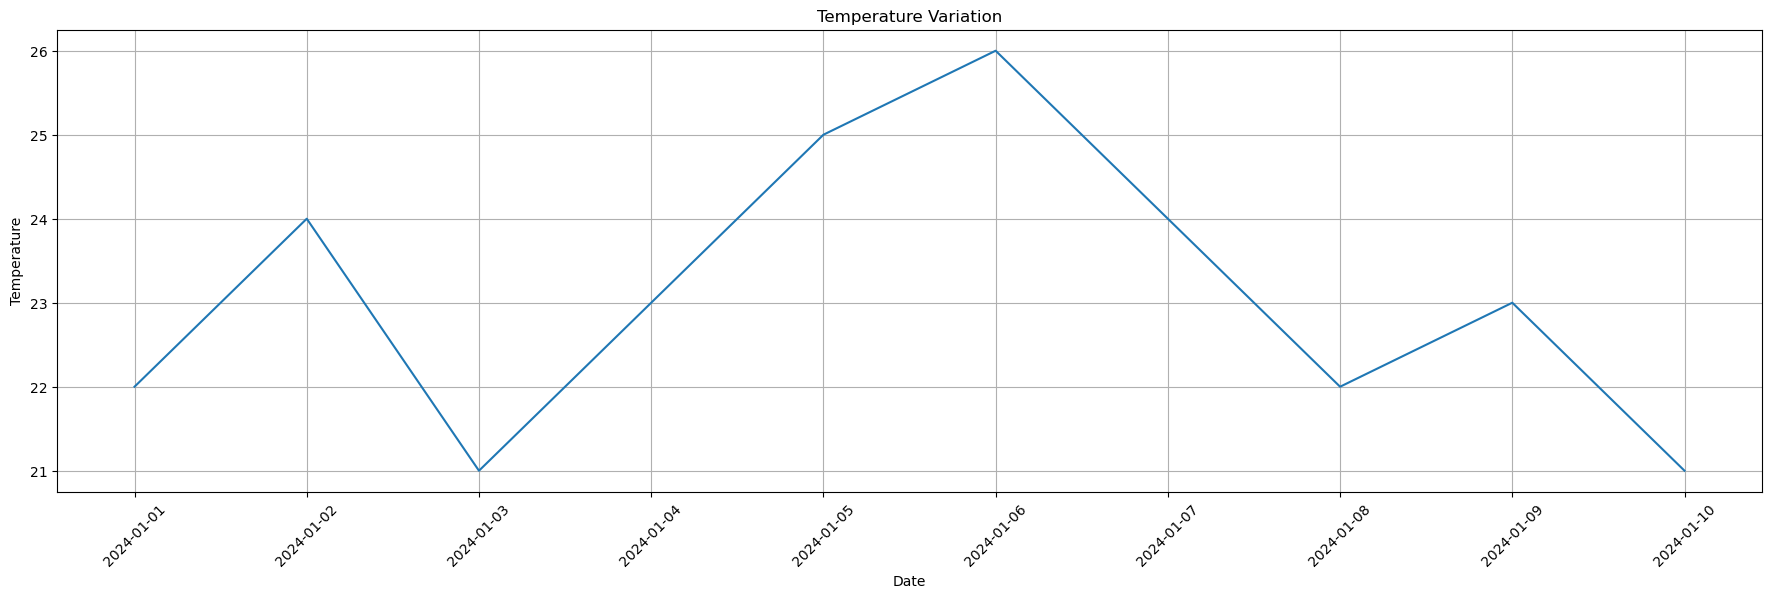

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame (Replace this with your actual DataFrame)
data = {
    'Date': pd.date_range(start='2024-01-01', periods=10, freq='D'),
    'Temperature': [22, 24, 21, 23, 25, 26, 24, 22, 23, 21]  # Ensure correct column name
}

df = pd.DataFrame(data)
df.set_index('Date', inplace=True)  # Set Date as index

# Debugging: Check the available columns
print("Available columns:", df.columns)

# Strip spaces from column names (if any)
df.columns = df.columns.str.strip()

# Check if 'Temp' exists (case-insensitive search)
matching_columns = [col for col in df.columns if 'temp' in col.lower()]
if matching_columns:
    temp_col = matching_columns[0]  # Use the correct column name
    print(f"Using column: {temp_col}")
else:
    raise KeyError("No column related to 'Temp' found. Available columns:", df.columns)

# Plot the temperature variation
plt.figure(figsize=(22, 6))
sns.lineplot(x=df.index, y=df[temp_col])  # Use corrected column name
plt.title('Temperature Variation')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

